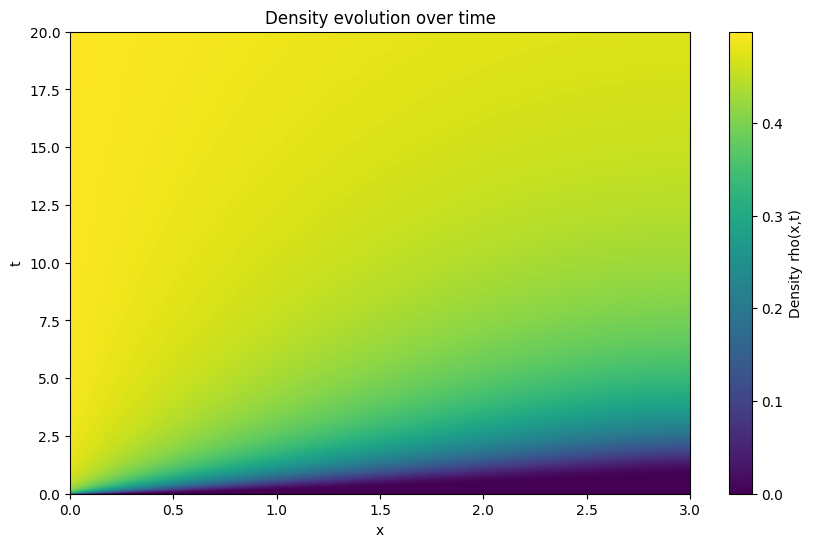

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 3         # Length of the domain
T = 20.0          # Total time
dx = 0.025         # Space step
dt = 0.0005        # Time step
sigma_1 = 0.5**2    # Diffusion coefficient
a = 0.9        # Boundary parameter at x=0
b = 0.975          # Boundary parameter at x=L
rho_max = 1.0    # Maximum density
v_m = 1.5        # Maximum velocity

# Define the function f(rho)
def f(rho):
    return v_m * (1 - rho / rho_max)

# Define the function df/drho
def df_drho(rho):
    return -v_m / rho_max

# Define the spatial and temporal grid
Nx = int(L / dx) + 1  # Number of spatial points
Nt = int(T / dt) + 1  # Number of time points
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)

# Initialize rho
rho = np.zeros((Nt, Nx))

# Finite difference scheme
for n in range(0, Nt-1):
    for i in range(1, Nx-1):
        drho_dt = sigma_1 * (rho[n, i+1] - 2*rho[n, i] + rho[n, i-1]) / dx**2 \
                  - (rho[n, i+1] - rho[n, i-1]) / (2*dx) * (f(rho[n, i]) + rho[n, i] * df_drho(rho[n, i]))
        rho[n+1, i] = rho[n, i] + dt * drho_dt

    # Boundary conditions
    rho[n+1, 0] = (a * (rho_max - rho[n+1, 1]) * dx + sigma_1 * rho[n+1, 1]) / (sigma_1 + a * dx)
    rho[n+1, -1] = (b * rho[n+1, -2] * dx + sigma_1 * rho[n+1, -2]) / (sigma_1 + b * dx)

# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(rho, extent=[0, L, 0, T], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Density rho(x,t)')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Density evolution over time')
plt.show()


In [100]:
len(rho.T)

121

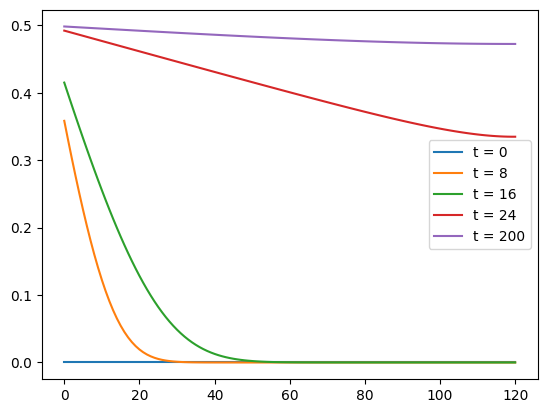

In [103]:
plt.plot(rho[0], label='t = 0')
plt.plot(rho[200], label='t = 8')
plt.plot(rho[500], label='t = 16')
plt.plot(rho[10000], label='t = 24')
plt.plot(rho[-1], label='t = 200')
#plt.ylim([0.3, 0.7])
plt.legend()
plt.show()

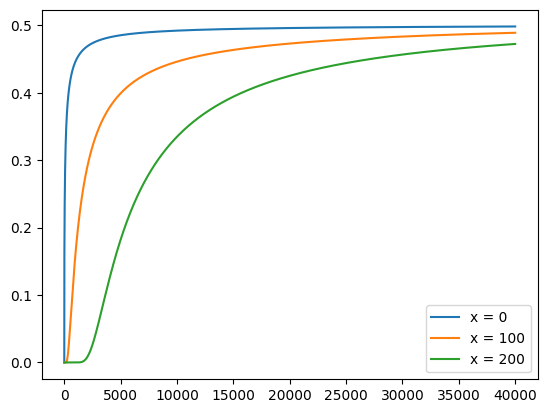

: 

In [104]:
plt.plot(rho.T[0], label='x = 0')
plt.plot(rho.T[30], label='x = 100')
plt.plot(rho.T[-1], label='x = 200')
plt.legend()
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_108436\3950455034.py:39: RuntimeWarning: overflow encountered in multiply
  j = -sigma * np.gradient(rho, dx) + f_rho * rho
C:\Users\andre\AppData\Local\Temp\ipykernel_108436\3950455034.py:42: RuntimeWarning: invalid value encountered in subtract
  rho_new[1:-1] = rho[1:-1] - dt / dx * (j[2:] - j[1:-1])
c:\Users\andre\OneDrive\Documentos\Warwick\Individual Project\Code\Warwick-Final-Project\venv\Lib\site-packages\numpy\lib\function_base.py:1238: RuntimeWarning: overflow encountered in divide
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)


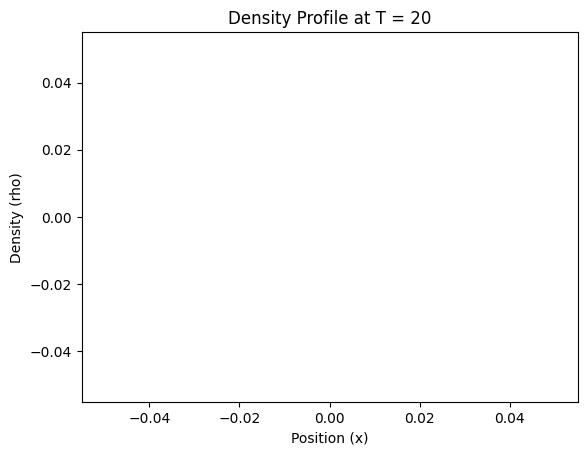

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma = 0.5**2
L = 3
T = 20
a = 0.9
b = 0.975
v_max = 2
rho_max = 1

# Discretization parameters
dx = 0.01
dt = 0.001  # Reduced time step for stability

# Derived parameters
nx = int(L / dx)
nt = int(T / dt)

# Initialize the density rho
rho = np.zeros(nx + 1)
rho_new = np.zeros(nx + 1)

# Initial condition (for example, let's start with a uniform distribution)
rho[:] = 0.5 * rho_max

# Boundary conditions (using ghost points for simplicity)
def left_boundary_condition(rho):
    return a * (rho_max - rho[0])

def right_boundary_condition(rho):
    return b * rho[-1]

# Time evolution
for t in range(nt):
    # Compute the flux j
    f_rho = v_max * (1 - rho / rho_max)
    j = -sigma * np.gradient(rho, dx) + f_rho * rho

    # Update rho using finite difference scheme
    rho_new[1:-1] = rho[1:-1] - dt / dx * (j[2:] - j[1:-1])
    
    # Apply boundary conditions
    j_left = left_boundary_condition(rho)
    j_right = right_boundary_condition(rho)
    rho_new[0] = rho[0] - dt / dx * (j[1] - j_left)
    rho_new[-1] = rho[-1] - dt / dx * (j_right - j[-2])
    
    # Update rho for the next time step
    rho[:] = rho_new[:]

# Plot the final result
plt.plot(np.linspace(0, L, nx + 1), rho)
plt.xlabel('Position (x)')
plt.ylabel('Density (rho)')
plt.title('Density Profile at T = {}'.format(T))
plt.show()